<a href="https://colab.research.google.com/github/kate-melnykova/DrugPrescription/blob/main/Drug_classfication_exploratory%26basic_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://www.kaggle.com/prathamtripathi/drug-classification

In [2]:
from google.colab import files
uploaded = files.upload()

Saving drug200.csv to drug200 (2).csv


In [3]:
import io

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv(io.BytesIO(uploaded['drug200.csv']))

In [5]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [6]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


# Data Exploration

In [7]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


## Age

(array([16., 22., 20., 20., 21., 28., 16., 23., 18., 16.]),
 array([15. , 20.9, 26.8, 32.7, 38.6, 44.5, 50.4, 56.3, 62.2, 68.1, 74. ]),
 <a list of 10 Patch objects>)

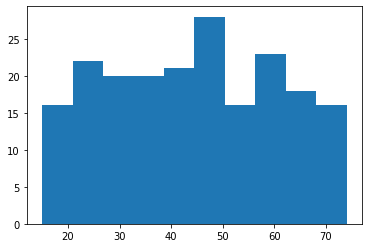

In [8]:
plt.hist(df['Age'])

##  Sex

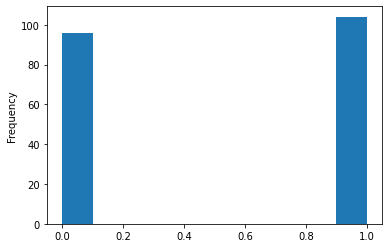

In [9]:
# convert it to binary
df['Male'] = df['Sex'].apply(lambda x: 1 if x == 'M' else 0)
df['Male'].plot(kind='hist')

## BP

<BarContainer object of 200 artists>

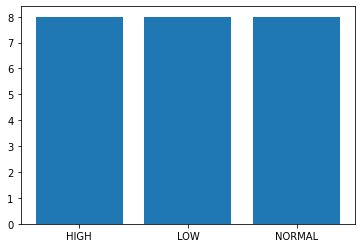

In [10]:
plt.bar(df['BP'], height=8)

In [11]:
print(df['BP'].unique())

['HIGH' 'LOW' 'NORMAL']


In [12]:
# it is ordered, so let's convert it to numbers
BP_mapper = {
    'HIGH': 2,
    'NORMAL': 1,
    'LOW': 0
    }
df['BP_idx'] = df['BP'].apply(lambda x: BP_mapper[x])

## Cholesterol

['HIGH' 'NORMAL']


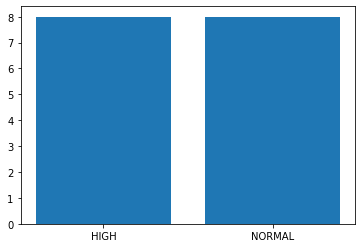

In [13]:
plt.bar(df['Cholesterol'], height=8)
print(df['Cholesterol'].unique())

In [14]:
df['Cholesterol_high'] = df['Cholesterol'].apply(lambda x: 1 if x == 'HIGH' else 0)

## Na_to_K

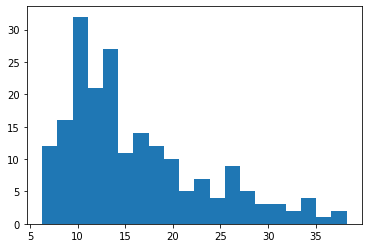

In [15]:
plt.hist(df['Na_to_K'], bins=20)
plt.show()

In [16]:
# check on outliers
df['Na_to_K'].describe()
# looks legitimate

count    200.000000
mean      16.084485
std        7.223956
min        6.269000
25%       10.445500
50%       13.936500
75%       19.380000
max       38.247000
Name: Na_to_K, dtype: float64

## Drug

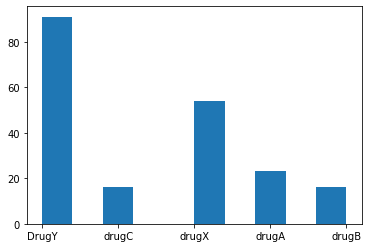

In [17]:
plt.hist(df['Drug'])
plt.show()

We have a predominant drug - the df is not balanced

In [18]:
# it is a label which will be one-hot encoded. There is no point to process it now.

# Pair-wise investigation of features

In [19]:
df.describe()

,Age,Na_to_K,Male,BP_idx,Cholesterol_high
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,16.084485,0.520000,1.065000,0.515000
std,16.544315,7.223956,0.500854,0.839224,0.501029
min,15.000000,6.269000,0.000000,0.000000,0.000000
25%,31.000000,10.445500,0.000000,0.000000,0.000000
50%,45.000000,13.936500,1.000000,1.000000,1.000000
75%,58.000000,19.380000,1.000000,2.000000,1.000000
max,74.000000,38.247000,1.000000,2.000000,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


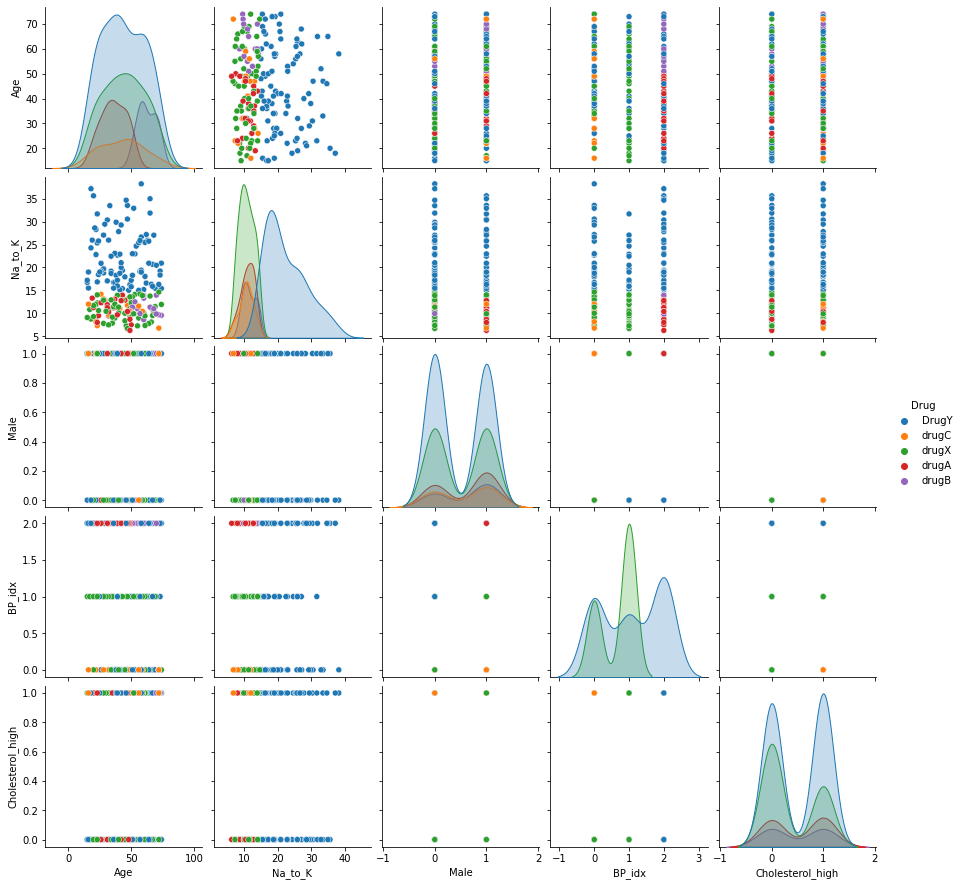

In [20]:
import seaborn as sns

sns.pairplot(df, hue='Drug')

In [21]:
# it looks like that some pairs are more predictive than others

# Pre-processing flow

In [22]:
df = pd.read_csv(io.BytesIO(uploaded['drug200.csv']))

In [23]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
indexes = y.index
y = pd.Series(le.fit_transform(y), index=indexes)
y.head()

# for further investigation, let us encode the steps above
class PreProcess:
    categorical_columns = ['Drug']
    numerical_columns = ['Age', 'Na_to_K', 'BP', 'Cholesterol', 'Male']

    def transform1(self, df):
        df2 = df.sample(frac=1)
        df2['Male'] = df['Sex'].apply(lambda x: int(x == 'M'))
        df2 = df2.drop('Sex', axis=1)
        df2['BP'] = df['BP'].apply(self.BPmapper)
        df2['Cholesterol'] = df['Cholesterol'].apply(lambda x: int(x == 'HIGH'))
        return df2

    def transform2(self, df):
        df[self.numerical_columns] = self.ss.transform(df[self.numerical_columns])
        df['Drug'] = self.le.transform(df['Drug'])
        return df

    def __init__(self):
        self.le = LabelEncoder()
        self.ss = StandardScaler()

    def fit(self, df):
        df = self.transform1(df)
        self.ss.fit(df[self.numerical_columns])
        self.le.fit(df['Drug'])
        return df
    
    def fit_transform(self, df):
        df = self.fit(df)
        return self.transform2(df)
    
    @staticmethod
    def BPmapper(x):
        return {
            'LOW': 0,
            'NORMAL': 1,
            'HIGH': 2
        }[x]

NameError: ignored

In [ ]:
data = PreProcess().fit_transform(df)
data.head()

In [ ]:
# separate target from features
y = data['Drug']
data = data.drop('Drug', axis=1)

# Model fitting

## Cross-validation setup

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, auc, balanced_accuracy_score, log_loss


def get_cv_scores(model, n_splits=5, metric='accuracy_score', model_args={}):
    cv_scores = list()
    folds = KFold(n_splits=5)
    folds.get_n_splits(data)

    metric = {
        'accuracy_score': accuracy_score,
         'auc': auc,
         'balanced_accuracy_score': balanced_accuracy_score,
         'log_loss': log_loss
         }[metric]

    for train_idx, test_idx in folds.split(data):
        X_train = data.loc[train_idx]
        y_train = y.loc[train_idx]
        X_test = data.loc[test_idx]
        y_test = y.loc[test_idx]

        clf = model(**model_args)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        cv_scores.append(metric(y_test, pred))
    return cv_scores

## Random forest, SVM, KNN, and Logistic Regression

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression

In [ ]:
print(f'Random forest scores {get_cv_scores(RF)}')
print(f'SVM scores {get_cv_scores(SVC)}')
print(f'KNN scores {get_cv_scores(KNN)}')
print(f'LogisticRegression scores {get_cv_scores(LogisticRegression)}')

* Random forest performs well but less consistent.
* SVM performs more consistently but slightly worse than the random forest
* KNN scores are lower, but also consistent
* LogisticRegression also does well


# Tuning random forest

Random forest performs almost perfect, but why not to tune it?

In [ ]:
# TODO

# Stacking approach

In [ ]:
# Random forest and logistic regression outperform other models. Let's try stacking

class Stack:
    models = {
        'rf': RF,
        'svc': SVC,
        'knn': KNN,
        'lr': LogisticRegression
        }
    def __init__(self):
        for name, model in self.models.items():
            setattr(self, name, model())
    
    def fit_submodels(self, X_train, y_train):
        for name in self.models:
            model = getattr(self, name)
            model.fit(X_train, y_train)

    def predict_submodels(self, X_test):
        preds = pd.DataFrame()
        for name in self.models:
            model = getattr(self, name)
            preds[name] = model.predict(X_test)
        return preds

    def fit(self, X_train, y_train):
        self.fit_submodels(X_train, y_train)
        preds = self.predict_submodels(X_train)
        self.stack = LogisticRegression()
        self.stack.fit(preds, y_train)
    
    def predict(self, X_test):
        preds = self.predict_submodels(X_test)
        return self.stack.predict(preds)

In [ ]:
print(f'Stacking cross-val scores: {get_cv_scores(Stack)}')

In [ ]:
# not really an improvement for the random forest, but good to try

# Major vote

Random forest, SVM, and LogisticRegression perform well on the dataset. In this case, stats claim that their majority vote will perform even better. Let us verify it.

In [ ]:
from collections import Counter

class MajorVote:
    models = {
        'rf': RF,
        'svc': SVC,
        'lr': LogisticRegression
        }
    def __init__(self):
        for name, model in self.models.items():
            setattr(self, name, model())
    
    def fit_submodels(self, X_train, y_train):
        for name in self.models:
            model = getattr(self, name)
            model.fit(X_train, y_train)

    def predict_submodels(self, X_test):
        preds = pd.DataFrame()
        for name in self.models:
            model = getattr(self, name)
            preds[name] = model.predict(X_test)
        return preds

    def fit(self, X_train, y_train):
        self.fit_submodels(X_train, y_train)
 
    def predict(self, X_test):
        preds = self.predict_submodels(X_test)
        return preds.apply(self.majority_vote, axis=1)

    def majority_vote(self, predicted):
        return Counter(predicted).most_common(1)[0][0]



In [ ]:
print(f"Random forest's cross-val scores are {get_cv_scores(RF)}")
print(f"Major vote's cross-val scores are {get_cv_scores(MajorVote)}")

While the scores in the major votes are about the same as for the random forest, they are more consistent, which, in turn, improves the reliability of the model.

# Conclusion

The random forest classifier provides the most accurate prediction of the prescribed medicine. Other models provide very good performance as well.

# Further direction

The scatter matrix suggests that Na_to_K, Gender, and BP are good predictors of the classes -- on the corresponding plots, colors are rather well separated. Can we do feature selection here?